<a href="https://colab.research.google.com/github/hublun/TWSApi/blob/master/IBApi_Historical_Data_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import scipy.stats as stat
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_pickle('/content/drive/MyDrive/TWS/M2K_20201115_to_20201120163500.pkl')

In [ ]:
df.columns[16:30]

Index(['dev', 'delta1m', 'delta2m', 'delta5m', 'delta10m', 'pbmin', 'pb5min',
       'pb10min', 'pb15min', 'pb30min', 'pfmin', 'pf2min', 'pf5min',
       'pf10min'],
      dtype='object')

In [ ]:
data = df[df.columns[16:30]]

In [ ]:
data

In [ ]:
label = data.pf5min
data = data[data.columns[0:10]]

In [ ]:
data

In [ ]:
x=data.values
y=label.values


In [ ]:
model = lgb.Booster(model_file='/content/drive/MyDrive/TWS/M2K_lgm_20201205.lgm')

In [ ]:
y_p = model.predict(x)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y, y_p) ** 0.5

1.9137478548254734

In [ ]:
"{0:.4f}".format(stat.pearsonr(y, y_p)[0])

'0.0177'

In [ ]:
stat.pearsonr(y, y_p)

(-0.004014593151675796, 0.2530455174063247)

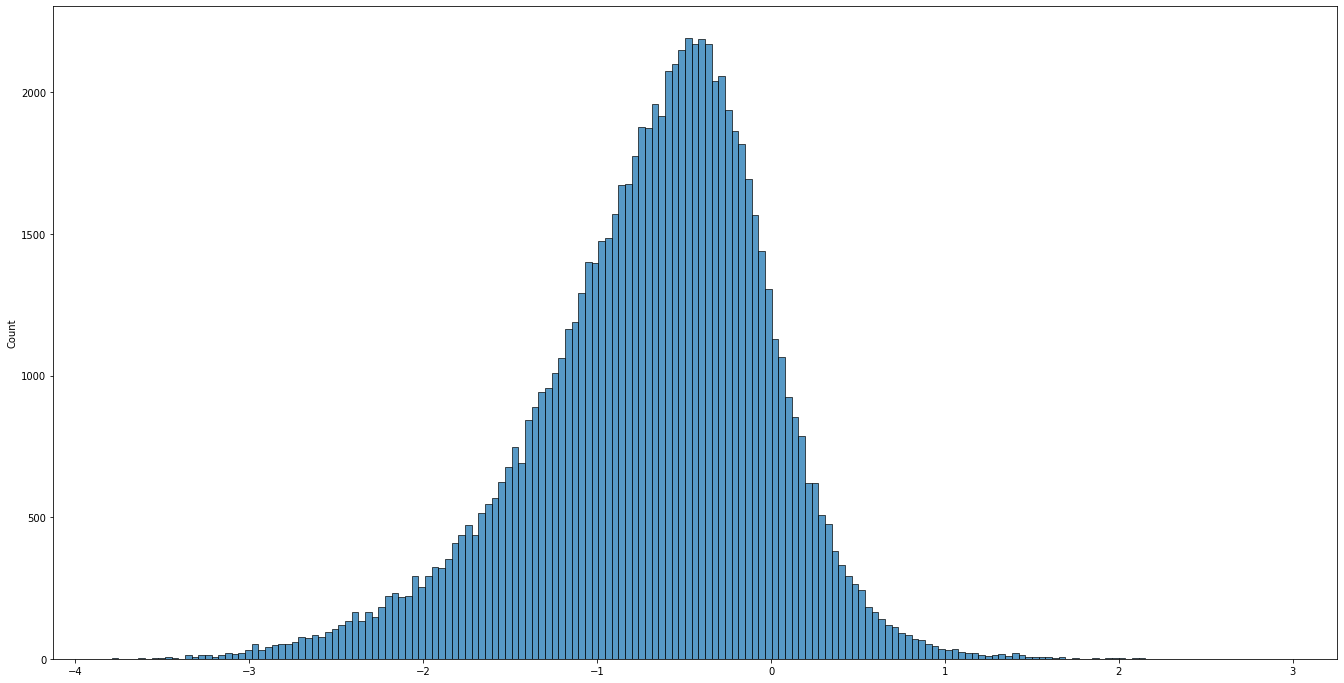

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(y_p)

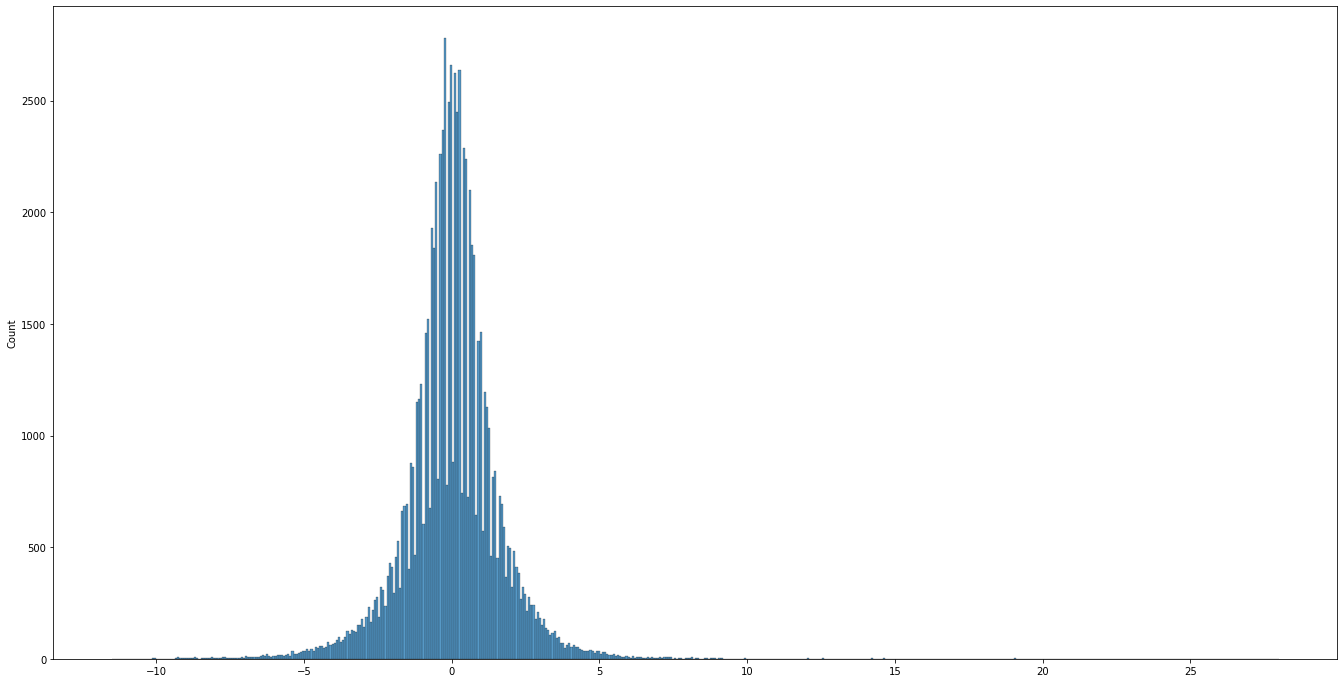

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.histplot(y)